In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Files to load
mouse_metadata_path = (r"C:\Users\bayek\OneDrive\Documents\GitHub\Module-5-Pharmaceuticals-\data\Mouse_metadata.csv")
study_results_path = (r"C:\Users\bayek\OneDrive\Documents\GitHub\Module-5-Pharmaceuticals-\data\Study_results.csv")

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Merge the two datasets based on Mouse ID
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [5]:
# Display the data table
data_table = pd.DataFrame(combined_data)
print(data_table)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Check the number of unique mice in the dataset
num_mice = combined_data["Mouse ID"].nunique()
print("Number of unique mice: ", num_mice)

Number of unique mice:  249


In [7]:
# Get the duplicate mice by ID number that show up for Mouse ID and Timepoint
duplicated_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

In [8]:
# Display the duplicate mice IDs
print("Duplicate mice IDs: ", duplicated_mice)

Duplicate mice IDs:  ['g989']


In [9]:
# Get all the data for the duplicate mouse ID
duplicate_data = combined_data[combined_data["Mouse ID"].isin(duplicated_mice)]

In [10]:
# Display the data table for the duplicate mouse ID
print("Data for duplicate mouse IDs:")
print(duplicate_data)

Data for duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female 

In [11]:
# Drop the duplicate mice by ID
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

In [12]:
# Display the data table for the clean data
print("Clean data table:")
print(clean_data)

Clean data table:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898               

In [13]:
# Count the number of mice in the clean data
num_mice = clean_data["Mouse ID"].nunique()

In [14]:
# Print the number of mice in the clean data
print("Number of mice in the clean data:", num_mice)

Number of mice in the clean data: 249


In [15]:
# Summary Statistics

In [16]:
# Group the data by Drug Regimen and calculate summary statistics for Tumor Volume
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

In [17]:
# Rename the columns of the summary statistics table
summary_stats = summary_stats.rename(columns={"mean": "Mean Tumor Volume (mm3)", "median": "Median Tumor Volume (mm3)", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})

In [18]:
# Display the summary statistics table
print("Summary statistics table:")
print(summary_stats)

Summary statistics table:
              Mean Tumor Volume (mm3)  Median Tumor Volume (mm3)  \
Drug Regimen                                                       
Capomulin                   40.675741                  41.557809   
Ceftamin                    52.591172                  51.776157   
Infubinol                   52.884795                  51.820584   
Ketapril                    55.235638                  53.698743   
Naftisol                    54.331565                  52.509285   
Placebo                     54.033581                  52.288934   
Propriva                    52.322552                  50.854632   
Ramicane                    40.216745                  40.673236   
Stelasyn                    54.233149                  52.431737   
Zoniferol                   53.236507                  51.818479   

              Tumor Volume Variance  Tumor Volume Std. Dev.  \
Drug Regimen                                                  
Capomulin                 24.94

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).rename(columns={"mean": "Mean Tumor Volume (mm3)", "median": "Median Tumor Volume (mm3)", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})

In [20]:
# Display summary statistics table
print("Summary statistics table:")
print(summary_stats)

Summary statistics table:
              Mean Tumor Volume (mm3)  Median Tumor Volume (mm3)  \
Drug Regimen                                                       
Capomulin                   40.675741                  41.557809   
Ceftamin                    52.591172                  51.776157   
Infubinol                   52.884795                  51.820584   
Ketapril                    55.235638                  53.698743   
Naftisol                    54.331565                  52.509285   
Placebo                     54.033581                  52.288934   
Propriva                    52.322552                  50.854632   
Ramicane                    40.216745                  40.673236   
Stelasyn                    54.233149                  52.431737   
Zoniferol                   53.236507                  51.818479   

              Tumor Volume Variance  Tumor Volume Std. Dev.  \
Drug Regimen                                                  
Capomulin                 24.94

In [21]:
# Bar & Pie charts

In [22]:
# Count the number of timepoints for each drug regimen
drug_counts = combined_data["Drug Regimen"].value_counts()

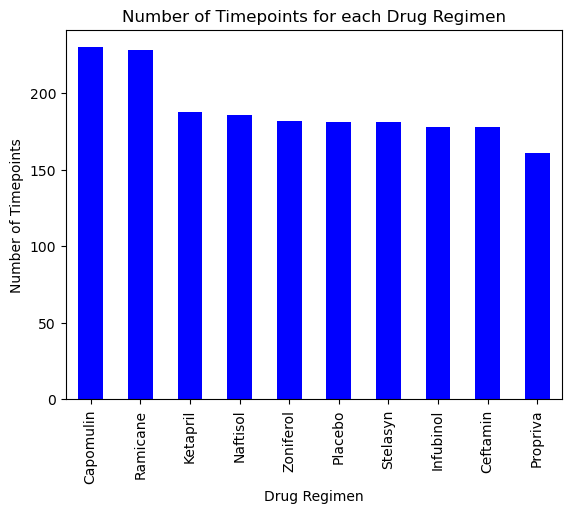

In [26]:
# Count the number of timepoints for each drug regimen
drug_counts = combined_data["Drug Regimen"].value_counts()

# Create a bar plot
drug_counts.plot(kind="bar", color="blue")

# Set the x-axis label and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints for each Drug Regimen")

# Display the plot
plt.show()

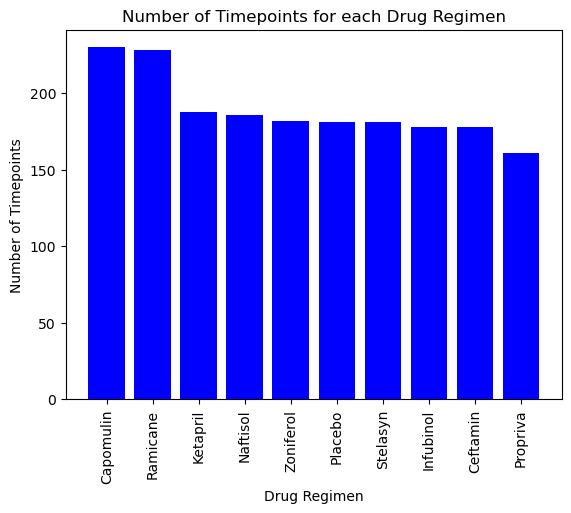

In [27]:
# Create a bar plot
plt.bar(drug_counts.index, drug_counts.values, color="blue")

# Set the x-axis label and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints for each Drug Regimen")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [28]:
# Create a new data frame based on mice ID's sex
gender_count = combined_data.groupby('Sex')['Mouse ID'].count()

<AxesSubplot:ylabel='Mouse ID'>

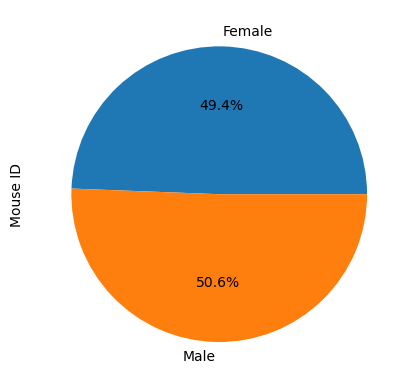

In [29]:
# Create a pie chart based on mice ID's sex
gender_count.plot.pie(y='Sex', autopct="%1.1f%%")

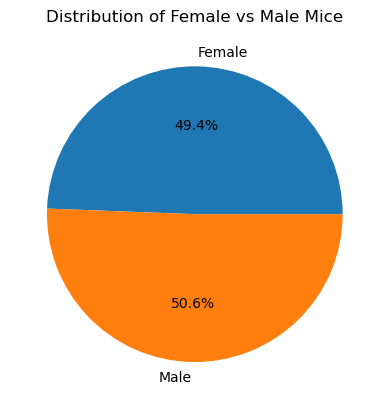

In [30]:
# Create a male vs female pie chart using pyplot
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%")
plt.title('Distribution of Female vs Male Mice')
plt.show()

In [31]:
# Quartiles, Outliers and Boxplots

In [32]:
# Create list of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [33]:
# Filter the data with treatments
filtered_data = combined_data[combined_data['Drug Regimen'].isin(treatments)]

In [34]:
# Get the last point of each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

In [35]:
# Convert last point into a data frame and reset the index
last_timepoint_df = last_timepoint.to_frame().reset_index()

In [36]:
# Merge the data frames 
merged_data = pd.merge(last_timepoint_df, combined_data, on=['Mouse ID', 'Timepoint'])

In [37]:
# Filter the merged data
final_tumor_volume = merged_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

In [38]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [47]:
# Loop through treatments
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = combined_data.loc[combined_data['Drug Regimen'] == treatment].groupby('Mouse ID')[['Timepoint', 'Tumor Volume (mm3)']].max()['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_count = (final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]).count()

    # print results
    print(f"For {treatment}, potential outliers count is {outliers_count}")

For Capomulin, potential outliers count is 0
For Ramicane, potential outliers count is 0
For Infubinol, potential outliers count is 0
For Ceftamin, potential outliers count is 0


In [66]:
# Line & Scatter Plots

In [67]:
# Filter the mice used on Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

In [68]:
# Get a unique list of mice data
mice = capomulin_data['Mouse ID'].unique()

In [69]:
# Choose which mice from the list and filter the data
mouse_id = mice[0] # choose the first mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

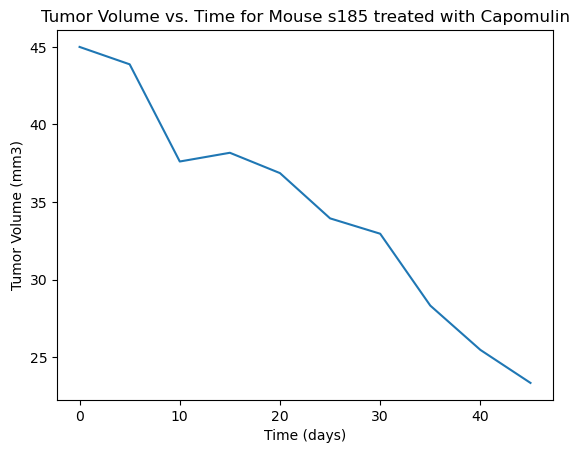

In [70]:
# Create a line plot of tumor volume vs time point using matplotlib
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Tumor Volume vs. Time for Mouse {mouse_id} treated with Capomulin")
plt.show()

Text(0.5, 1.0, 'Tumor Volume vs. Time for Mouse s185 treated with Capomulin')

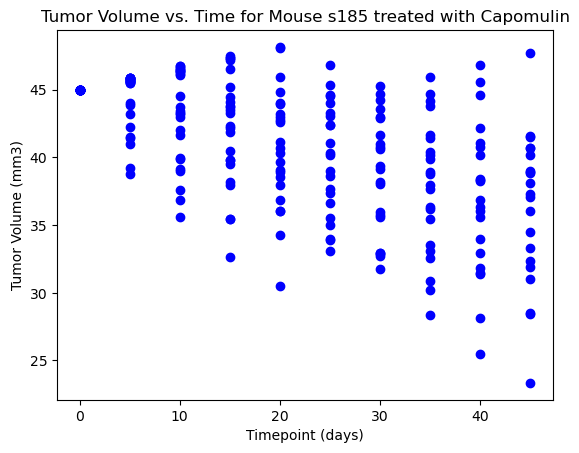

In [72]:
# Generate a scatter plot of tumor volume vs. time point for the selected mouse
plt.scatter(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Add labels and title to the plot
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time for Mouse s185 treated with Capomulin')

In [73]:
# Correlation and Regression